# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


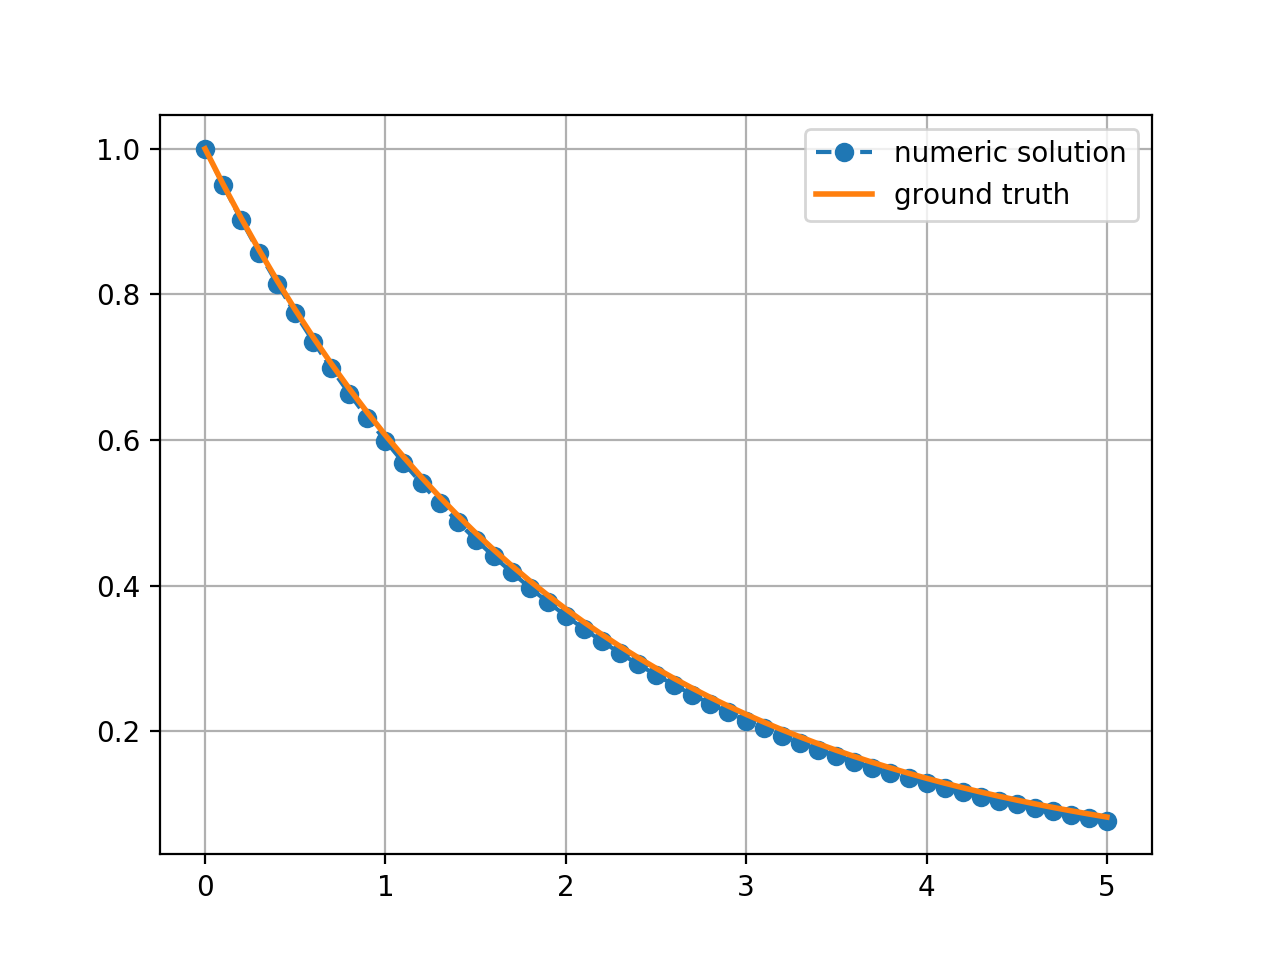

In [3]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


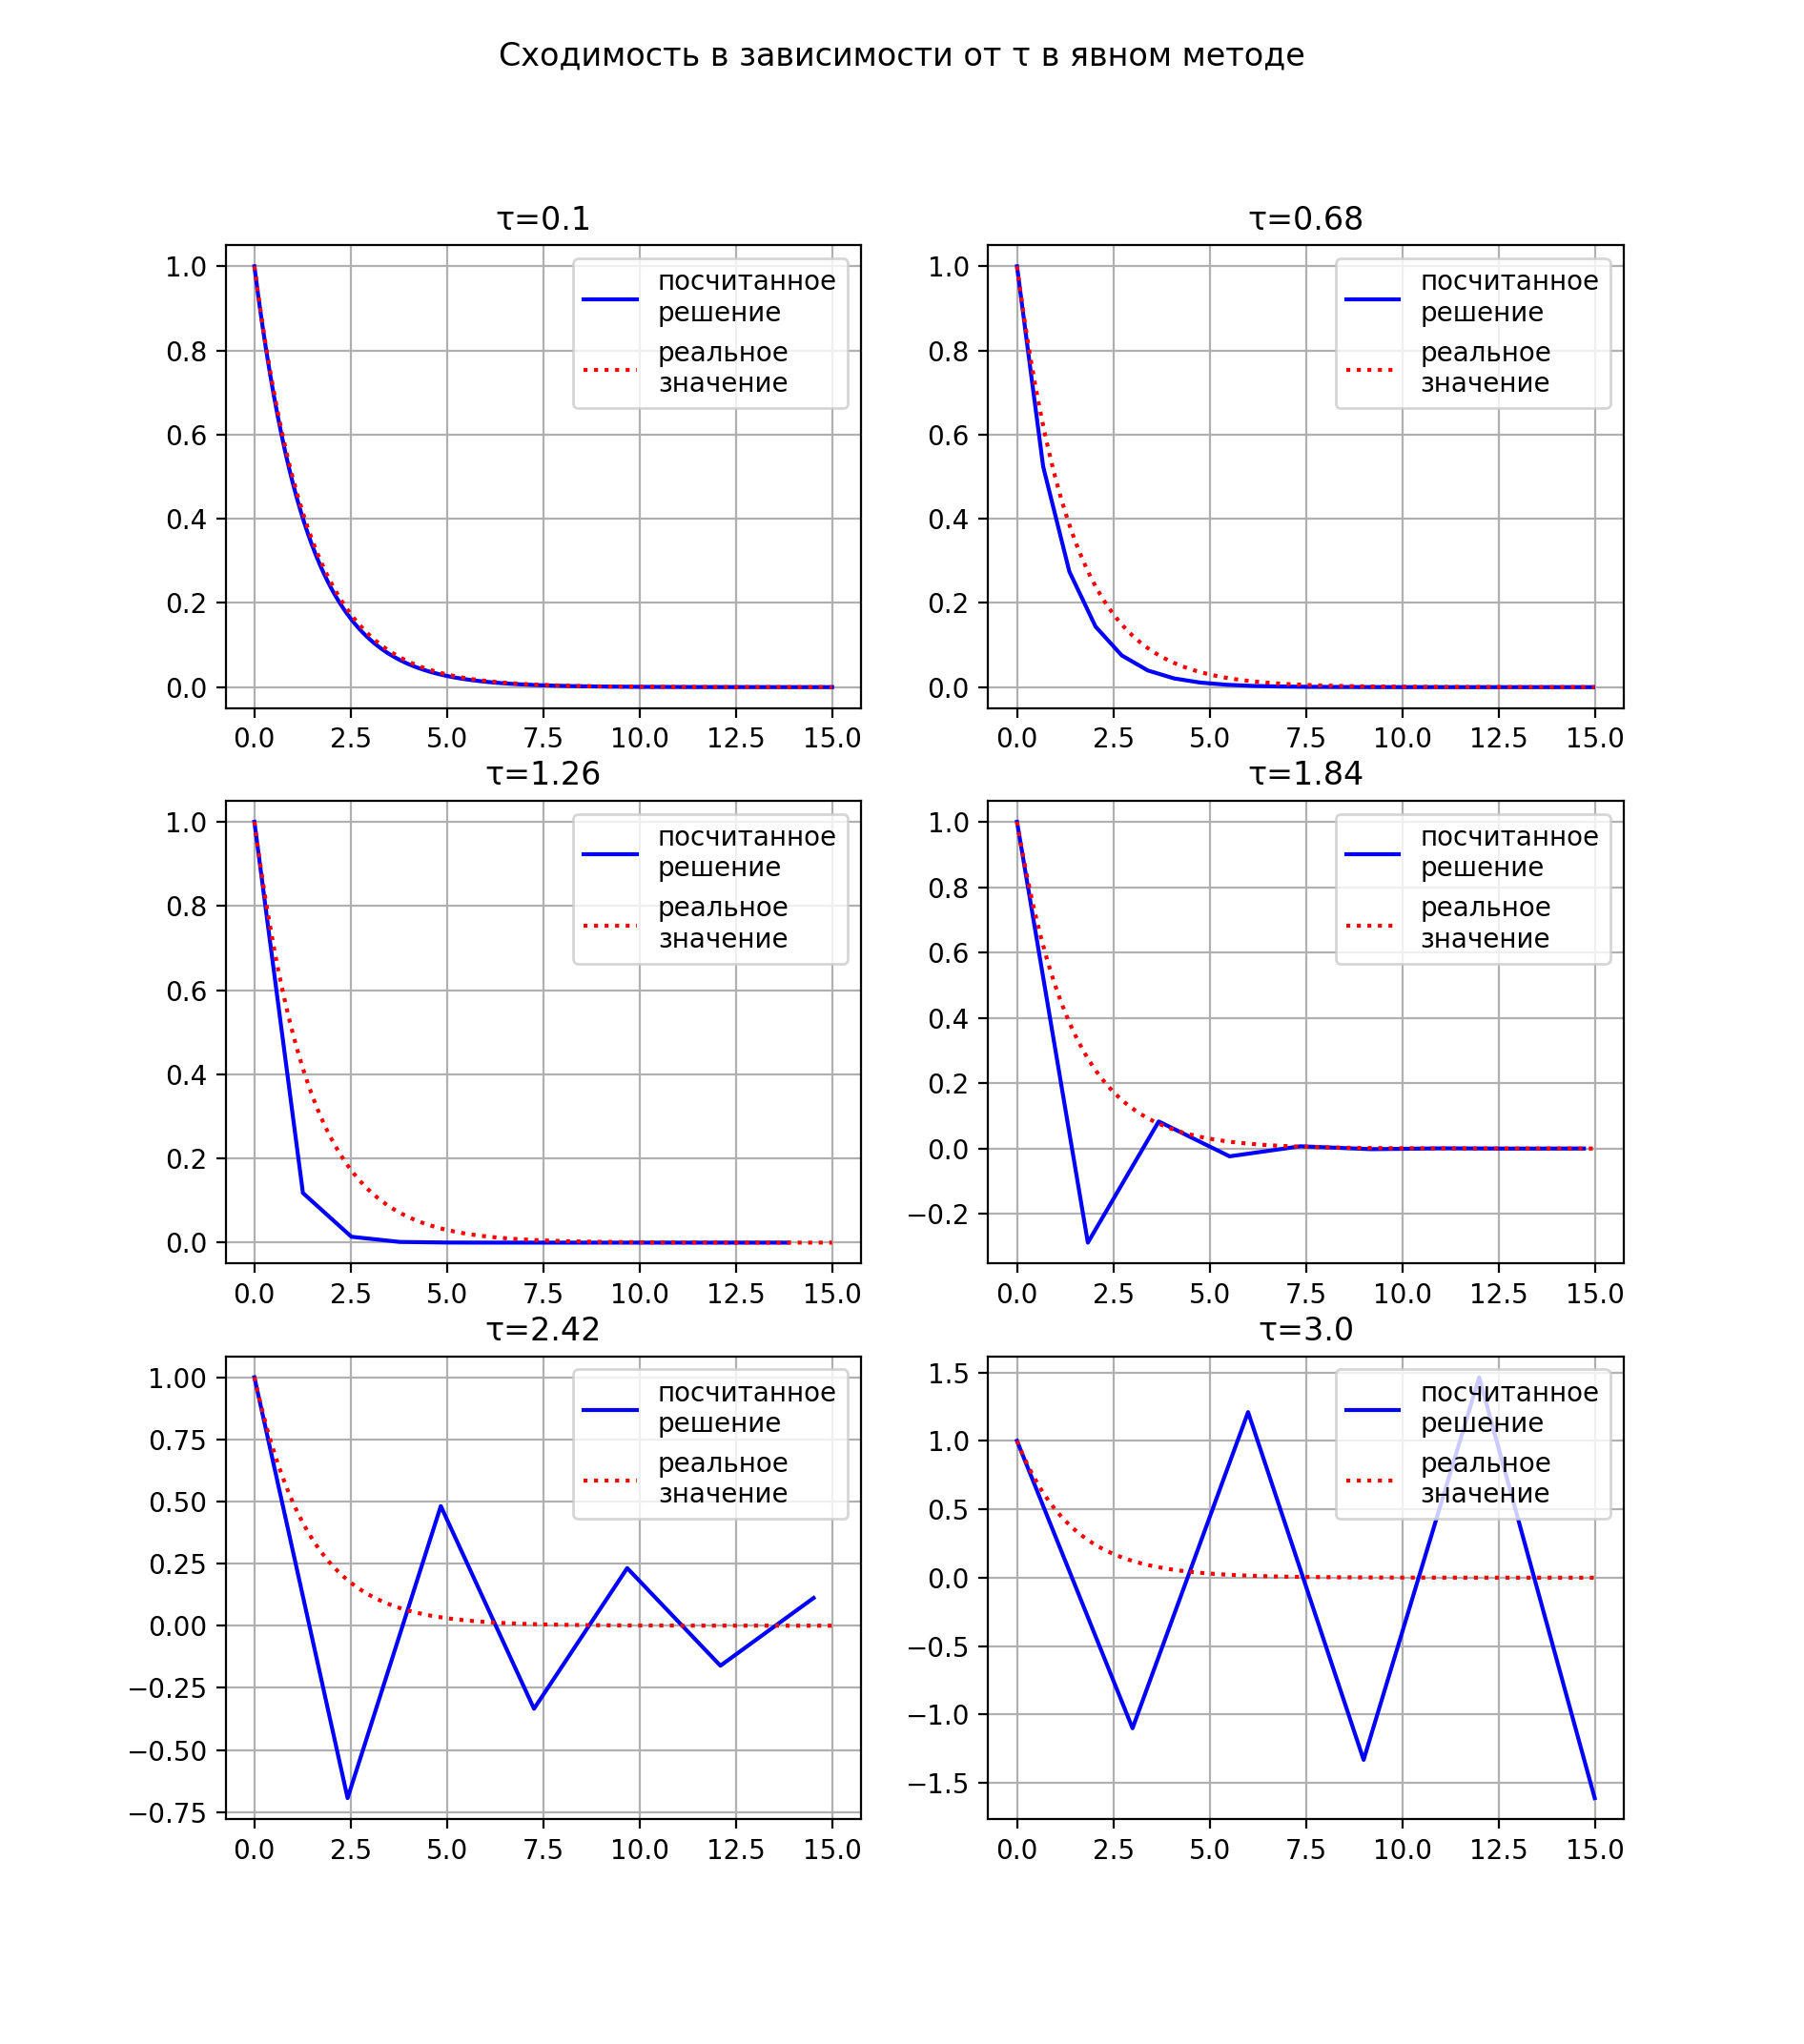

In [4]:
plt.figure()
plt.suptitle('Сходимость в зависимости от τ в явном методе')
lam = -0.7
tr = np.linspace(0, 15, 1000)
ur = np.exp(lam * tr)
for i in range(1, 7):
    t, u = euler_solve(lam, 1., 15, dt=0.58 * i - 0.48)
    plt.subplot(3, 2, i)
    plt.plot(t, u, 'b-', label='посчитанное\nрешение')
    plt.plot(tr, ur, 'r:', label='реальное\nзначение')
    plt.legend()
    plt.grid()
    plt.title('τ={}'.format(round(0.58 * i - 0.48, 2)))

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

$$
\frac{y_{n+1}-y_{n}}{\tau} = f(t_{n+1},y_{n+1}) = \lambda y_{n+1}
$$

$$
\Rightarrow y_{n+1} = \frac{1}{1-\lambda\tau}y_{n}
$$

In [5]:
def impl_euler_solve(lam, u0, T, dt):
    N = int(T / dt) + 1
    t = np.arange(N) * dt
    y = np.zeros_like(t)
    y[0] = u0
    for i in range(1, N):
        y[i] = y[i-1] / (1 - lam * dt)
    return t, y

<IPython.core.display.Javascript object>


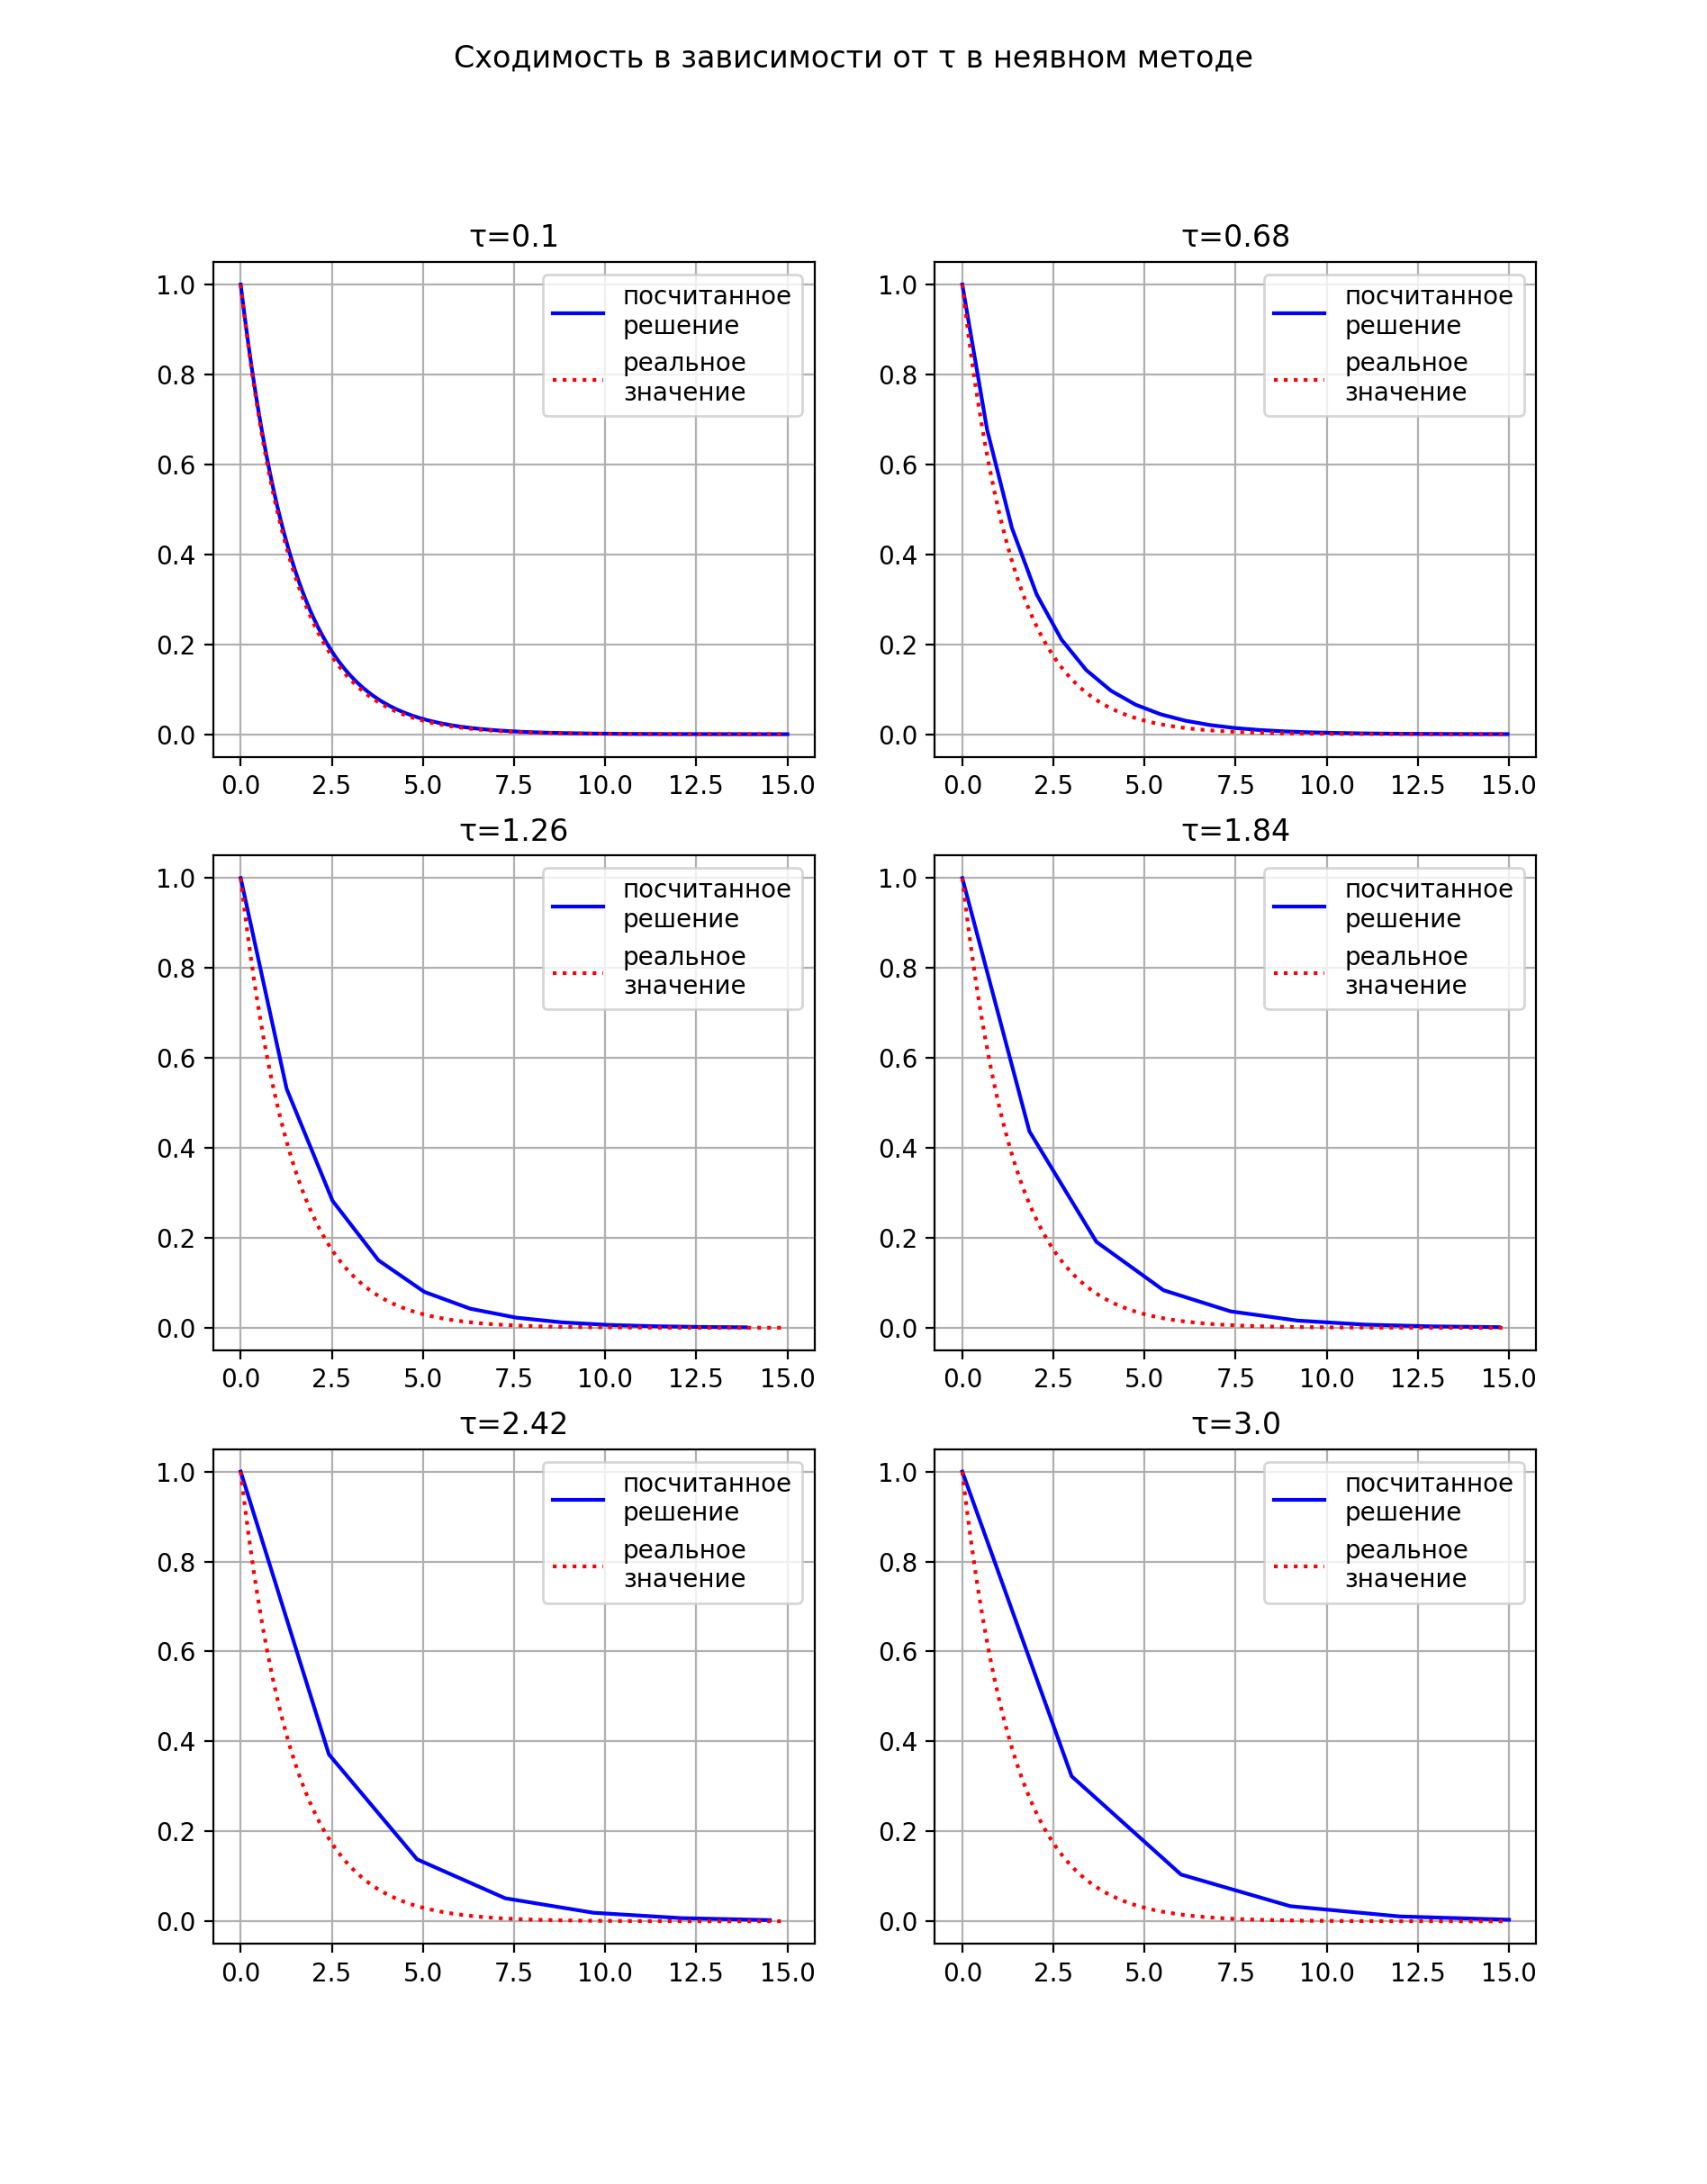

In [6]:
plt.figure()
plt.suptitle('Сходимость в зависимости от τ в неявном методе')
lam = -0.7
for i in range(1, 7):
    t, u = impl_euler_solve(lam, 1., 15, dt=0.58 * i - 0.48)
    plt.subplot(3, 2, i)
    plt.plot(t, u, 'b-', label='посчитанное\nрешение')
    plt.plot(tr, ur, 'r:', label='реальное\nзначение')
    plt.legend()
    plt.grid()
    plt.title('τ={}'.format(round(0.58 * i - 0.48, 2)))

Из графиков видно, что неявный метод всегда преуменьшает значение производной в точке (поэтому функция, построенная с его помощью, постоянно находится выше реального решения).  Как и ожидалось, явный метод начинает расходиться при $\tau > \frac{2}{|\lambda|}$

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [7]:
def euler_solve_2(A, u0, T, dt):
    N = int(T / dt)
    n = 2
    y = np.zeros((N+1, n))
    t = np.arange(N+1) * dt
    y[0, :] = u0
    E = np.eye(n)
    for i in range(N):
        y[i+1, :] = (E + A * dt) @ y[i, :]
    return t, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

<IPython.core.display.Javascript object>


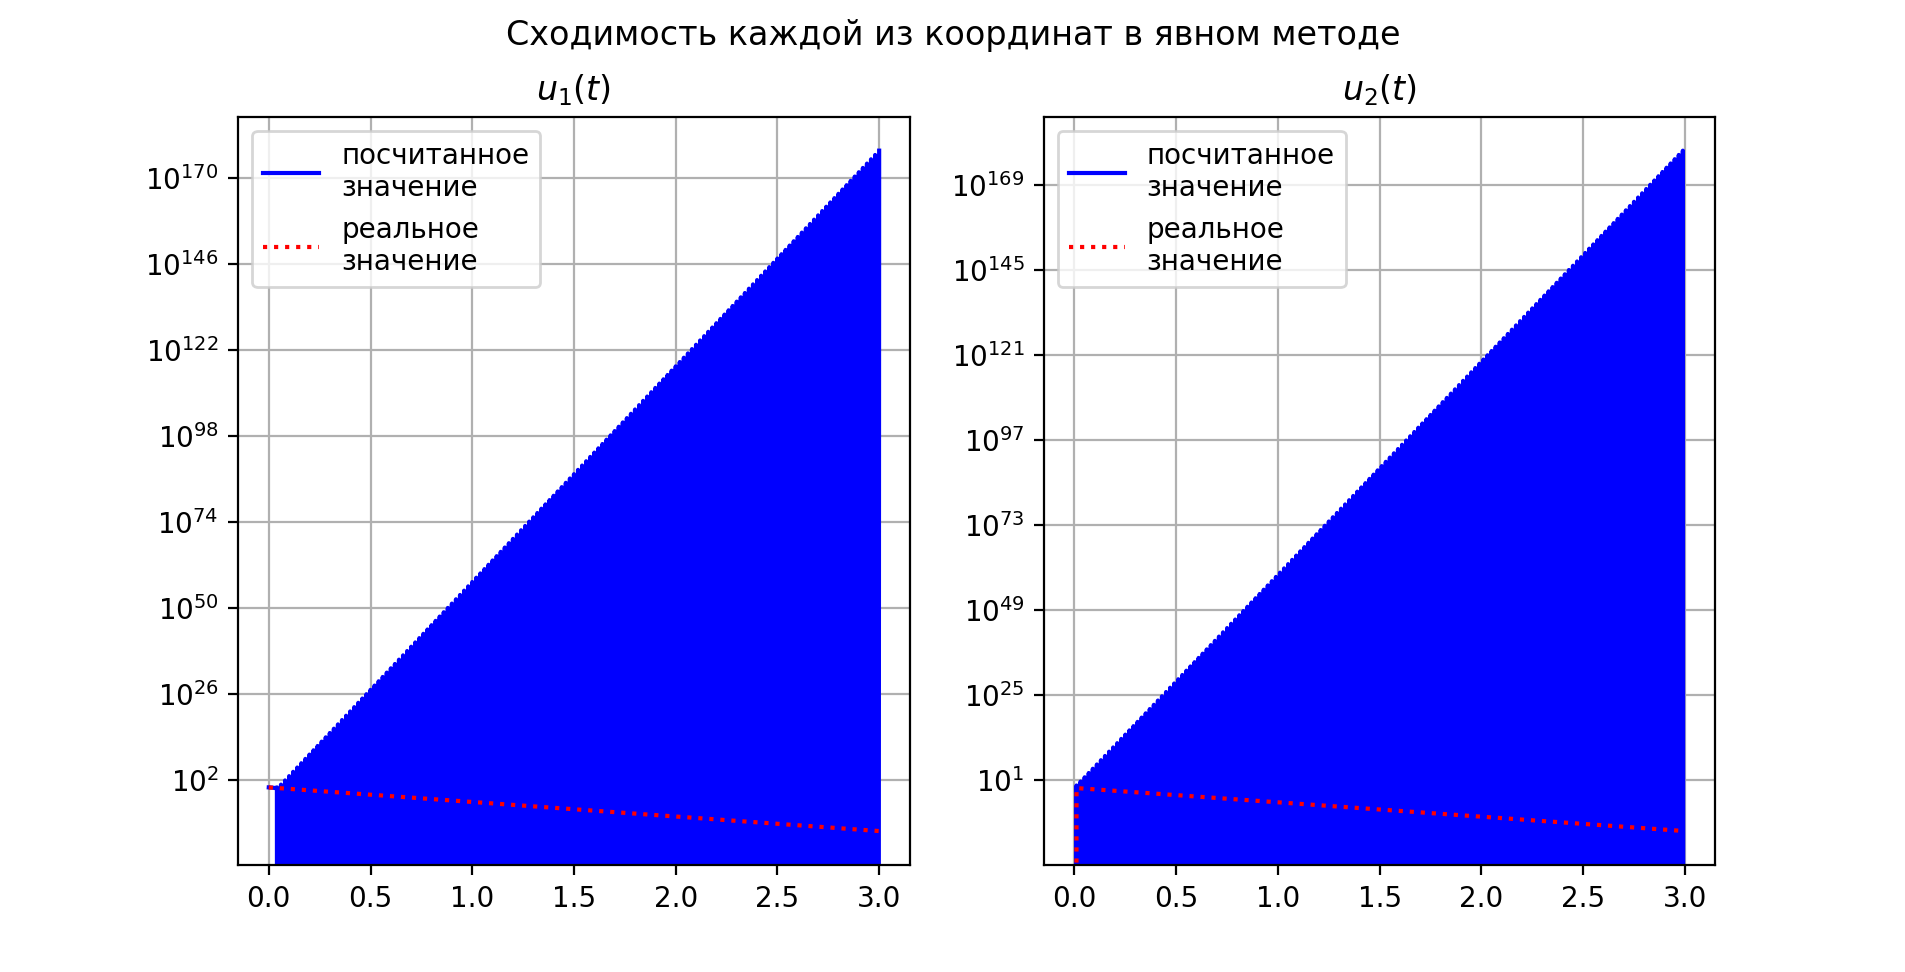

In [8]:
from scipy.linalg import expm


A = np.array([[-10, 10], 
              [32, -499]])
u0 = np.array([1, 0])
t, y = euler_solve_2(A, u0, 3, 0.01)
u = np.array([expm(A * i) @ u0 for i in t])


plt.figure()
plt.suptitle('Сходимость каждой из координат в явном методе')

plt.subplot(121)
plt.title('$u_1(t)$')
plt.plot(t, y[:, 0], 'b-', label='посчитанное\nзначение')
plt.plot(t, u[:, 0], 'r:', label='реальное\nзначение')
plt.yscale('log')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('$u_2(t)$')
plt.plot(t, y[:, 1], 'b-', label='посчитанное\nзначение')
plt.plot(t, u[:, 1], 'r:', label='реальное\nзначение')
plt.yscale('log')
plt.legend()
plt.grid()

In [9]:
v = np.array(np.linalg.eigvals(A))
print('Собственные значения: {}, {}'.format(*v))
print('Максимальное по модулю собственное значение: {}'.format(*v[np.where(max(abs(v)) == abs(v))]))
print('Макисмальное допустимое значение τ: {}'.format(2 / max(abs(v))))

Собственные значения: -9.346476672269716, -499.6535233277303
Максимальное по модулю собственное значение: -499.6535233277303
Макисмальное допустимое значение τ: 0.004002773735447413


Из графиков видно, что алгоритм сильно расходится. Анализ собственных значений матрицы показывает, что этого и следовало ожидать, так как при данных собственных значениях $\tau$ более чем в два раза превышает максимальное допустимое значение, при котором алгоритм может сходиться

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

$$
\frac{y_{n+1}-y_{n}}{\tau} = A y_{n+1}  \Rightarrow  (E + \tau A)y_{n+1} = y_{n}
$$

In [10]:
def impl_euler_solve_2(A, u0, T, dt):
    N = int(T / dt) + 1
    n = 2
    y = np.zeros((N, n))
    t = np.arange(N) * dt
    y[0, :] = u0
    B = np.eye(n) - A * dt
    for i in range(1, N):
        y[i, :] = np.linalg.solve(B, y[i-1, :])
    return t, y

<IPython.core.display.Javascript object>


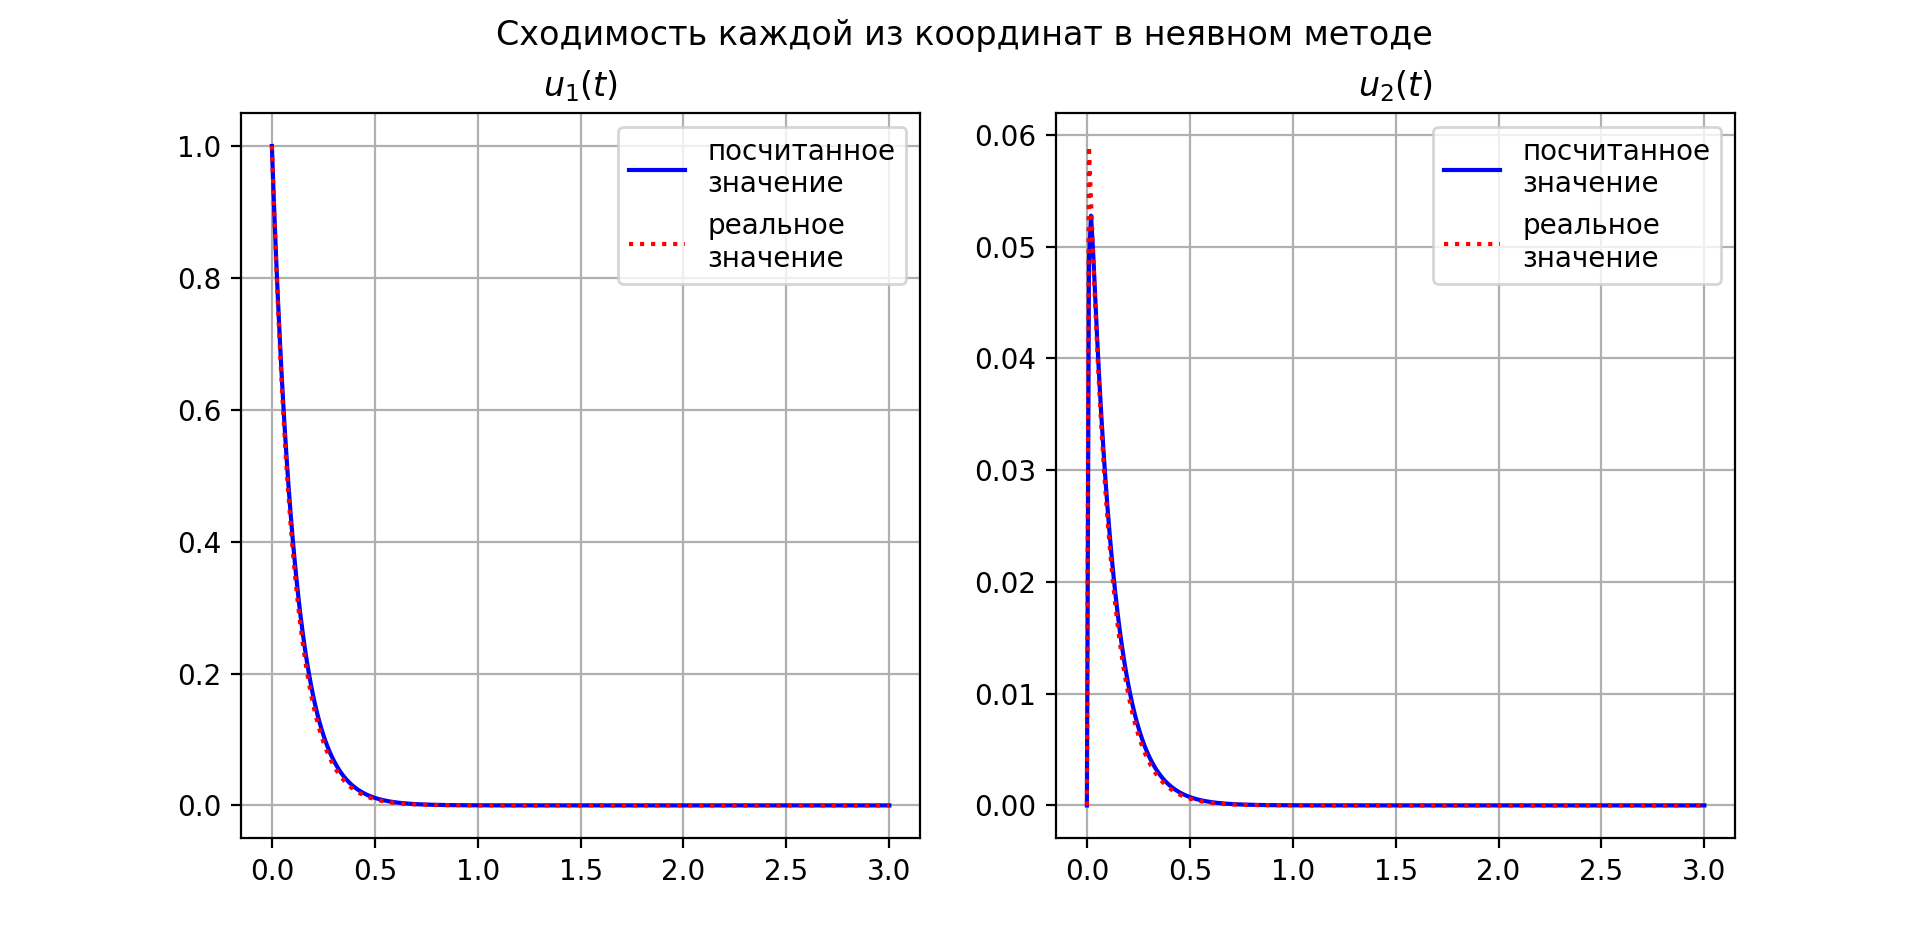

In [11]:
t, y = impl_euler_solve_2(A, u0, 3, 0.01)
u = np.array([expm(A * i) @ u0 for i in t])


plt.figure()
plt.suptitle('Сходимость каждой из координат в неявном методе')

plt.subplot(121)
plt.title('$u_1(t)$')
plt.plot(t, y[:, 0], 'b-', label='посчитанное\nзначение')
plt.plot(t, u[:, 0], 'r:', label='реальное\nзначение')
plt.legend()
plt.grid()

plt.subplot(122)
plt.title('$u_2(t)$')
plt.plot(t, y[:, 1], 'b-', label='посчитанное\nзначение')
plt.plot(t, u[:, 1], 'r:', label='реальное\nзначение')
plt.legend()
plt.grid()

Как и ожидалось, неявный метод хорошо сошелся при данном $\tau$

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

Введём новую функцию $v = \dot{u}$. С её помощью первоначальное уравнение можно записать следующим образом:


$$
\begin{cases} \dot{u} = v \\ \dot{v} + \omega^2 u = 0 \end{cases}
$$


Перепишем это в матричном виде:


$$
\frac{\mathrm{d}}{\mathrm{d}t} \begin{pmatrix} u \\ v \end{pmatrix} =
\begin{pmatrix} 0 & 1 \\ -\omega^2 & 0 \end{pmatrix}  \begin{pmatrix} u \\ v \end{pmatrix}
$$


Данное уравнение можно решить с помощью написанной функции `euler_solve_2`. Построим решение этого диффура для нескольких разных начальных условий и для разных значений $\omega$

<IPython.core.display.Javascript object>


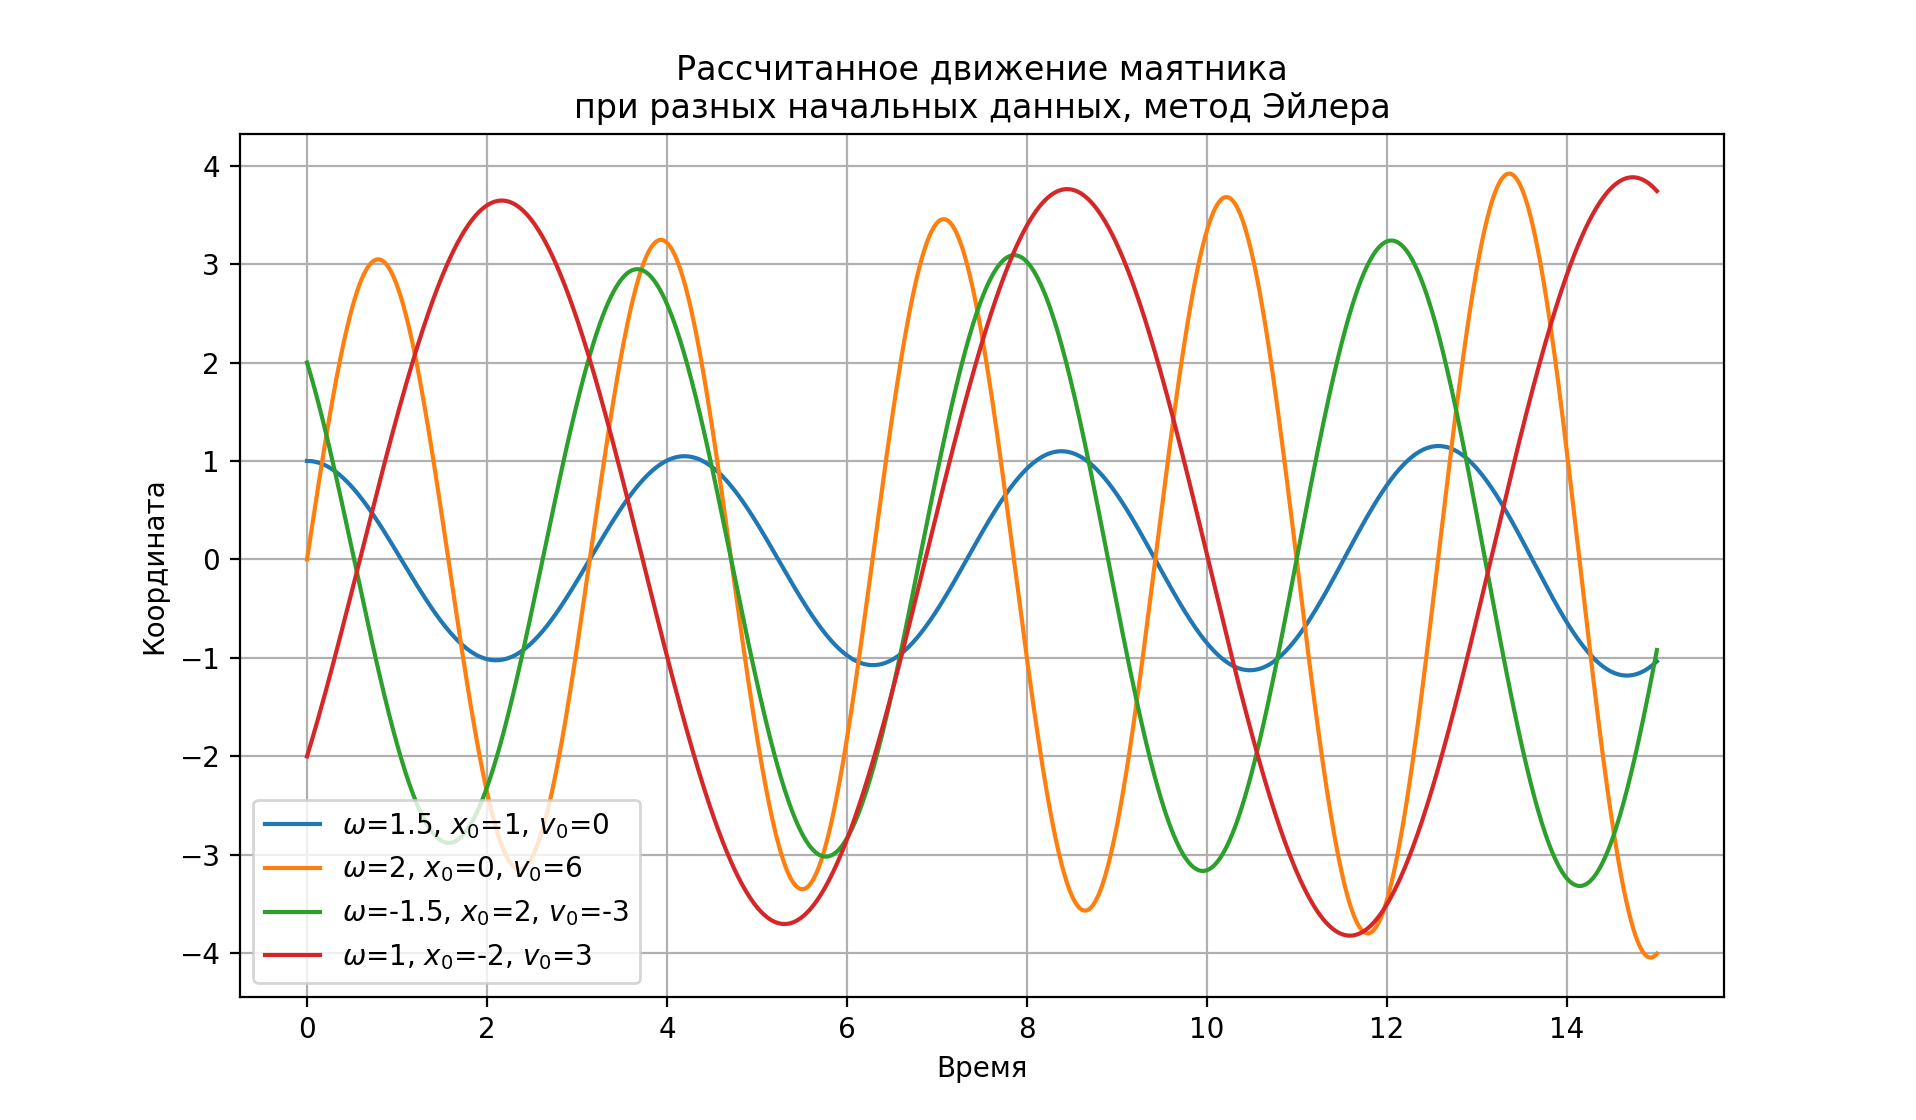

Text(0.5, 1.0, 'Рассчитанное движение маятника\nпри разных начальных данных, метод Эйлера')

In [12]:
plt.figure()
T = 15
for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t, x = euler_solve_2(A, x0, T, 0.01)
    plt.plot(t, x[:, 0], '-', label='$\omega$={}, $x_0$={}, $v_0$={}'.format(w, x0[0], x0[1]))
plt.legend()
plt.grid()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.title('Рассчитанное движение маятника\nпри разных начальных данных, метод Эйлера')

По графику уже понятно, что при численном решении диффура появляется дополнительное "раскачивание" осциллятора. Чтобы убедиться в этом, посмотрим на изменение со временем величины $\frac{v^2}{2} + \frac{\omega^2 u^2}{2}$

<IPython.core.display.Javascript object>


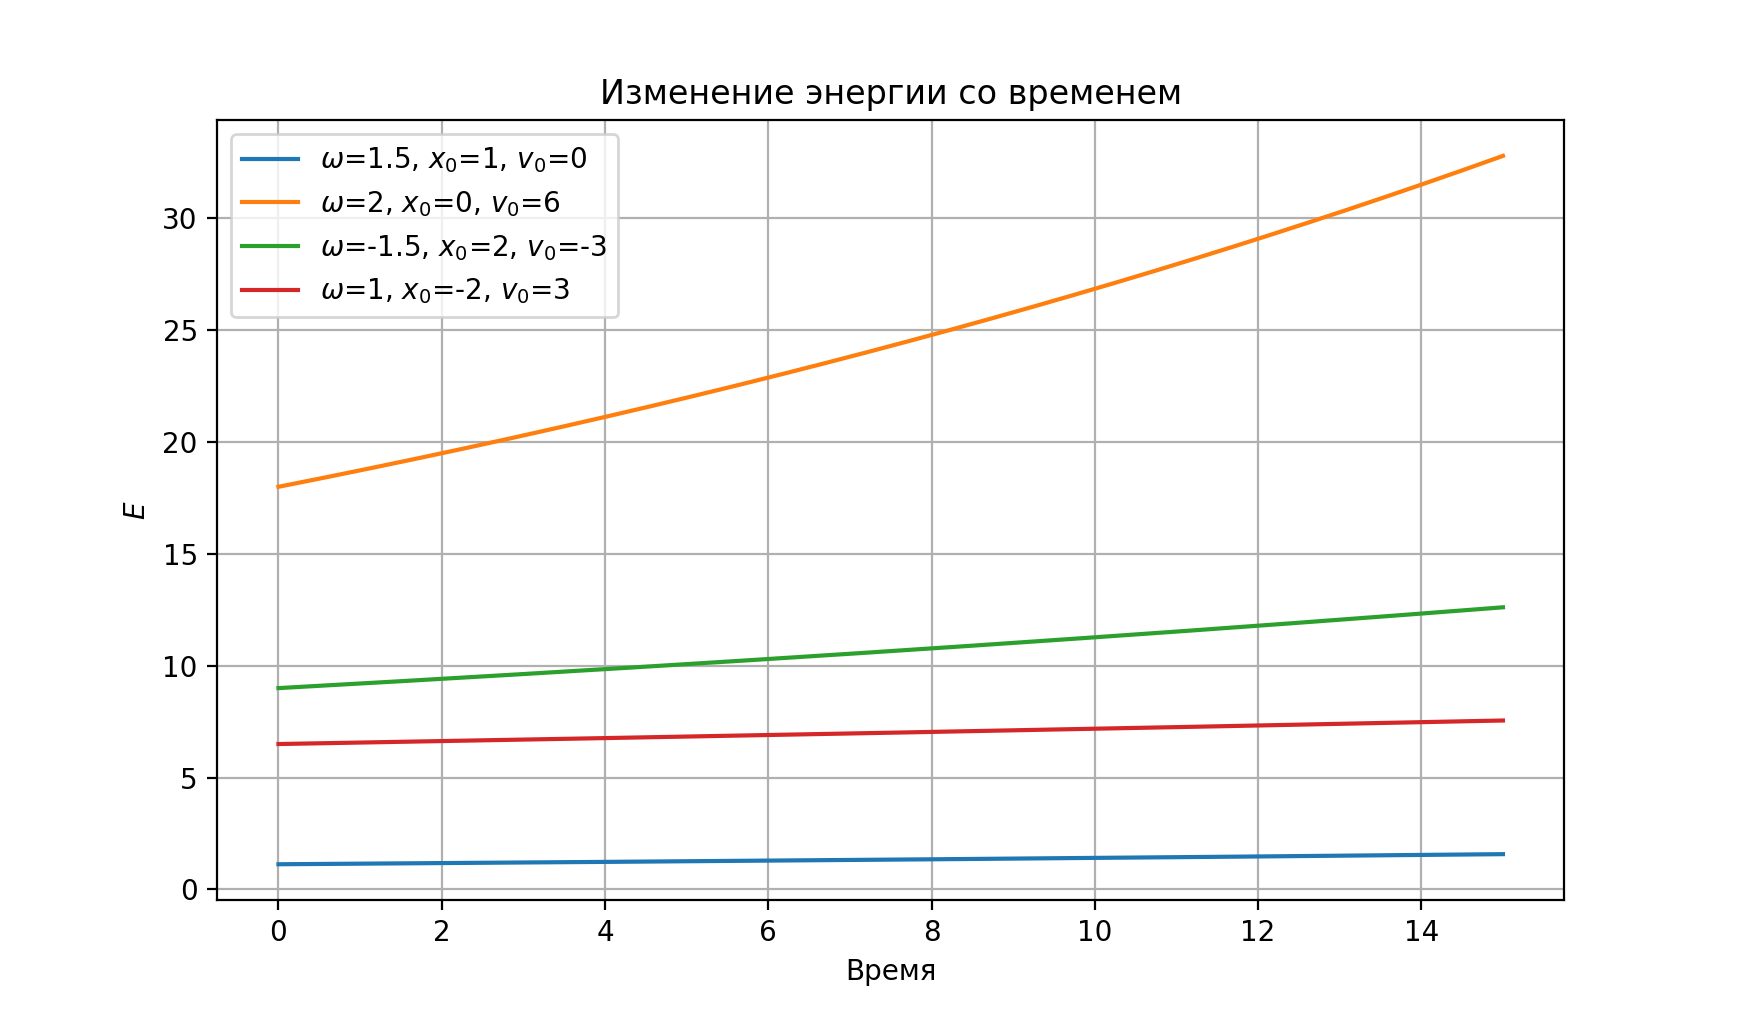

Text(0.5, 1.0, 'Изменение энергии со временем')

In [13]:
plt.figure()
for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t, x = euler_solve_2(A, x0, T, 0.01)
    plt.plot(t, x[:,1]**2 / 2 + w**2 * x[:,0]**2 / 2, 
             label='$\omega$={}, $x_0$={}, $v_0$={}'.format(w, *x0))
plt.legend()
plt.grid()
plt.xlabel('Время')
plt.ylabel('$E$')
plt.title('Изменение энергии со временем')

Как и ожидалось, энергия системы увеличивается

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

Идея метода:


$$
\begin{cases} \frac{y_{n+1/2} - y_{n}}{\tau/2} = f(t_{n}, y_{n}) \\ \\
\frac{y_{n+1} - y_{n}}{\tau} = f(t_{n} + \frac{\tau}{2}, y_{n+1/2}) \end{cases}
$$



In [14]:
def RK_solve(A, u0, T, dt):
    n = len(u0)
    N = int(T / dt)
    y = np.zeros((N+1, n))
    t = np.arange(N+1) * dt
    y[0, :] = u0
    for i in range(N):
        y_mid = y[i, :] + A @ y[i, :] * dt / 2
        y[i+1, :] = y_mid + A @ y_mid * dt / 2
    return t, y

<IPython.core.display.Javascript object>


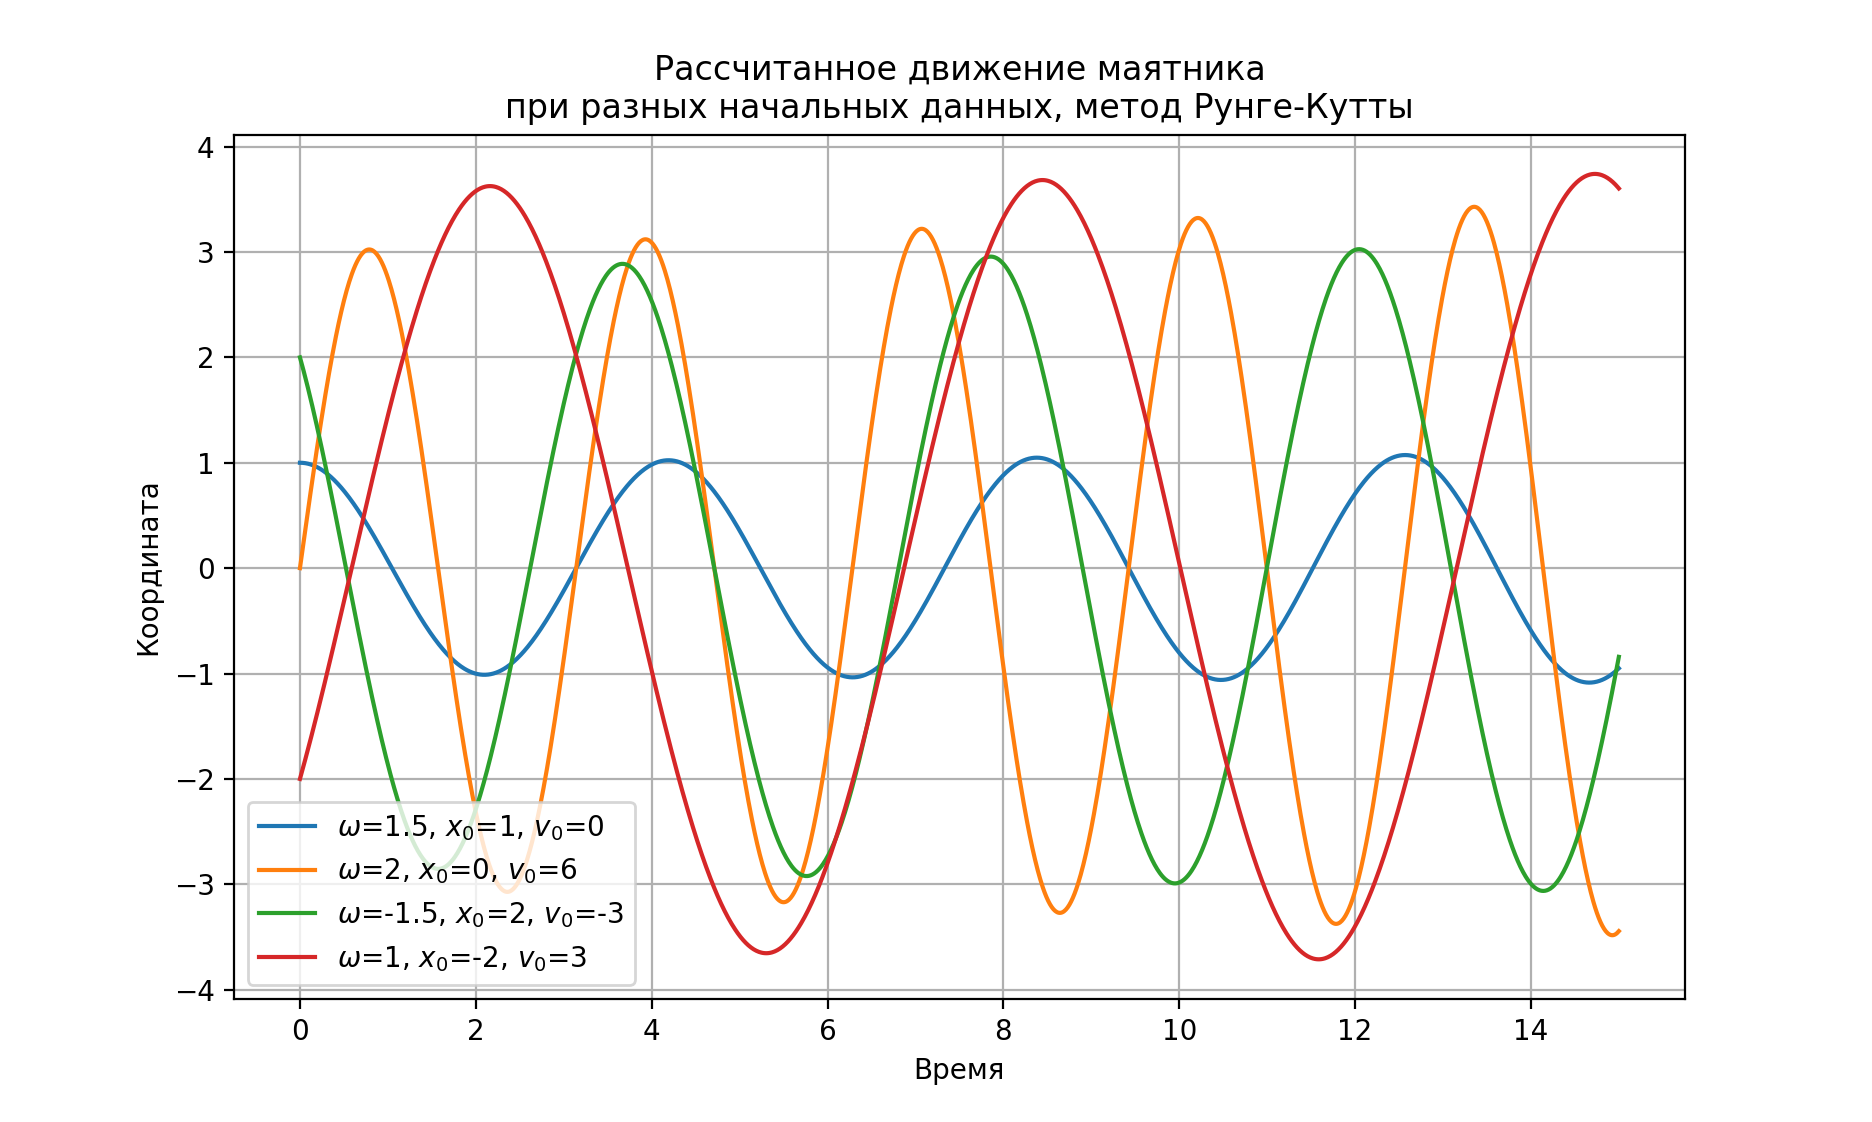

<IPython.core.display.Javascript object>


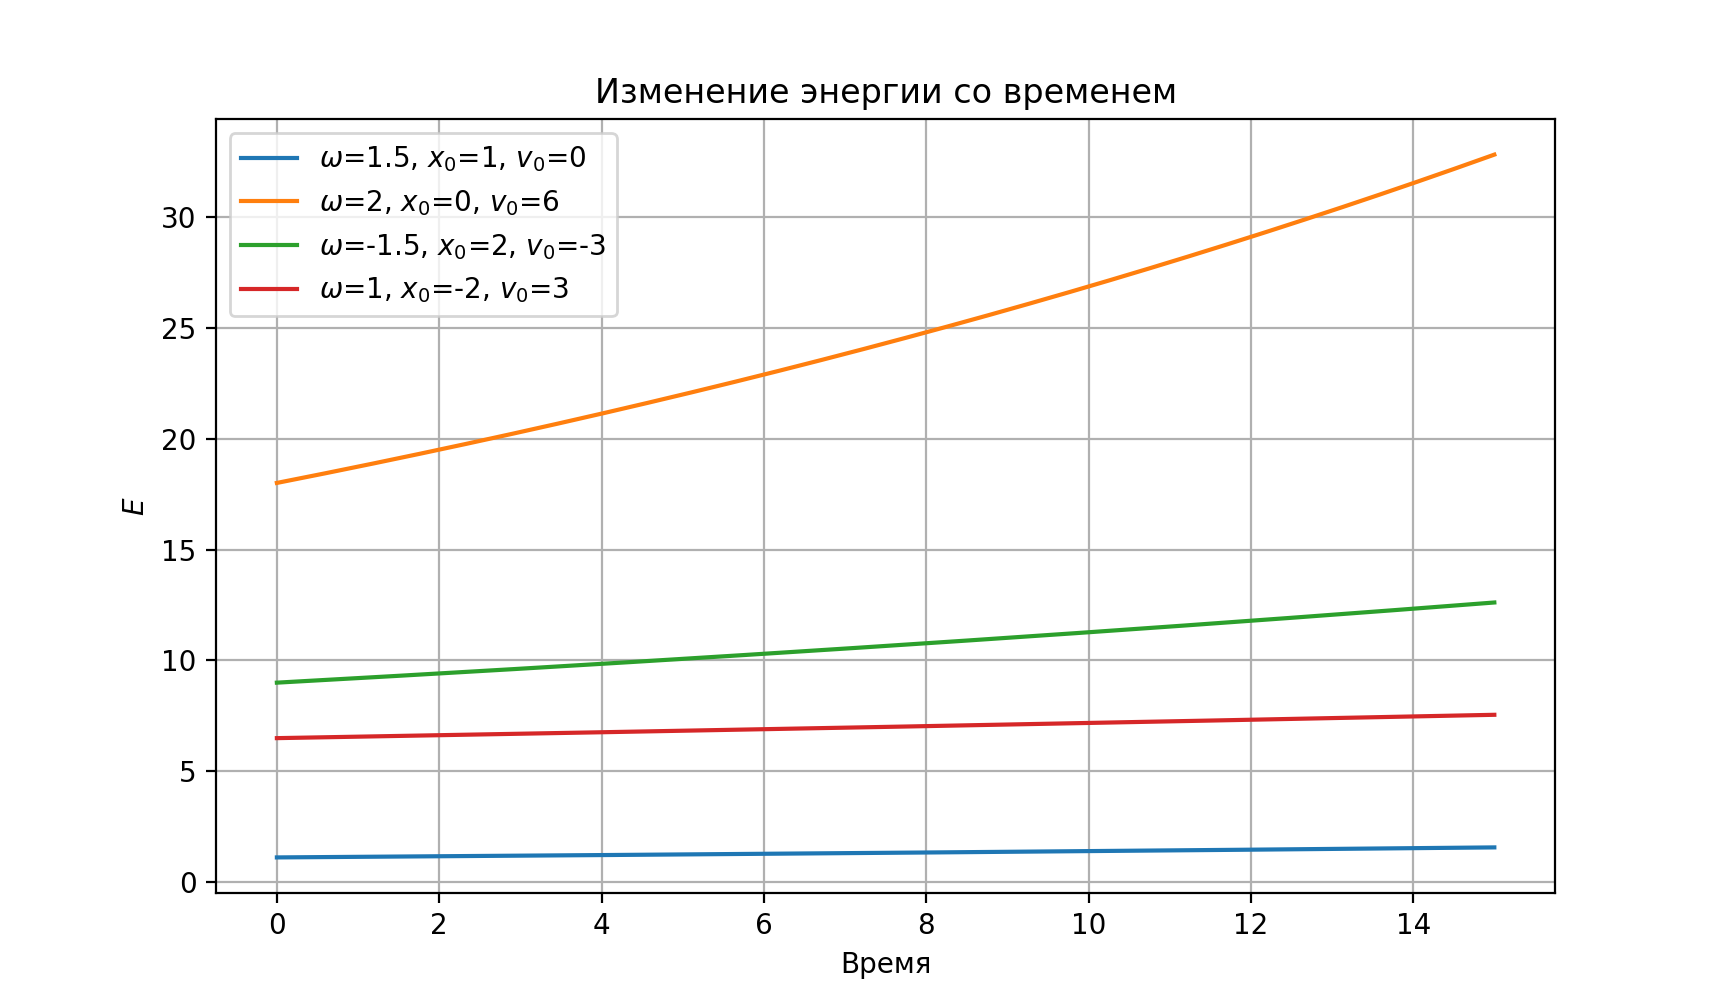

Text(0.5, 1.0, 'Изменение энергии со временем')

In [15]:
plt.figure()
for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t, x = RK_solve(A, x0, T, 0.01)
    plt.plot(t, x[:, 0], '-', label='$\omega$={}, $x_0$={}, $v_0$={}'.format(w, x0[0], x0[1]))
plt.legend()
plt.grid()
plt.xlabel('Время')
plt.ylabel('Координата')
plt.title('Рассчитанное движение маятника\nпри разных начальных данных, метод Рунге-Кутты')


plt.figure()
for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t, x = euler_solve_2(A, x0, T, 0.01)
    plt.plot(t, x[:,1]**2 / 2 + w**2 * x[:,0]**2 / 2, 
             label='$\omega$={}, $x_0$={}, $v_0$={}'.format(w, *x0))
plt.legend()
plt.grid()
plt.xlabel('Время')
plt.ylabel('$E$')
plt.title('Изменение энергии со временем')

Теперь посмотрим, есть ли разница в изменении энергии у двух методов

<IPython.core.display.Javascript object>


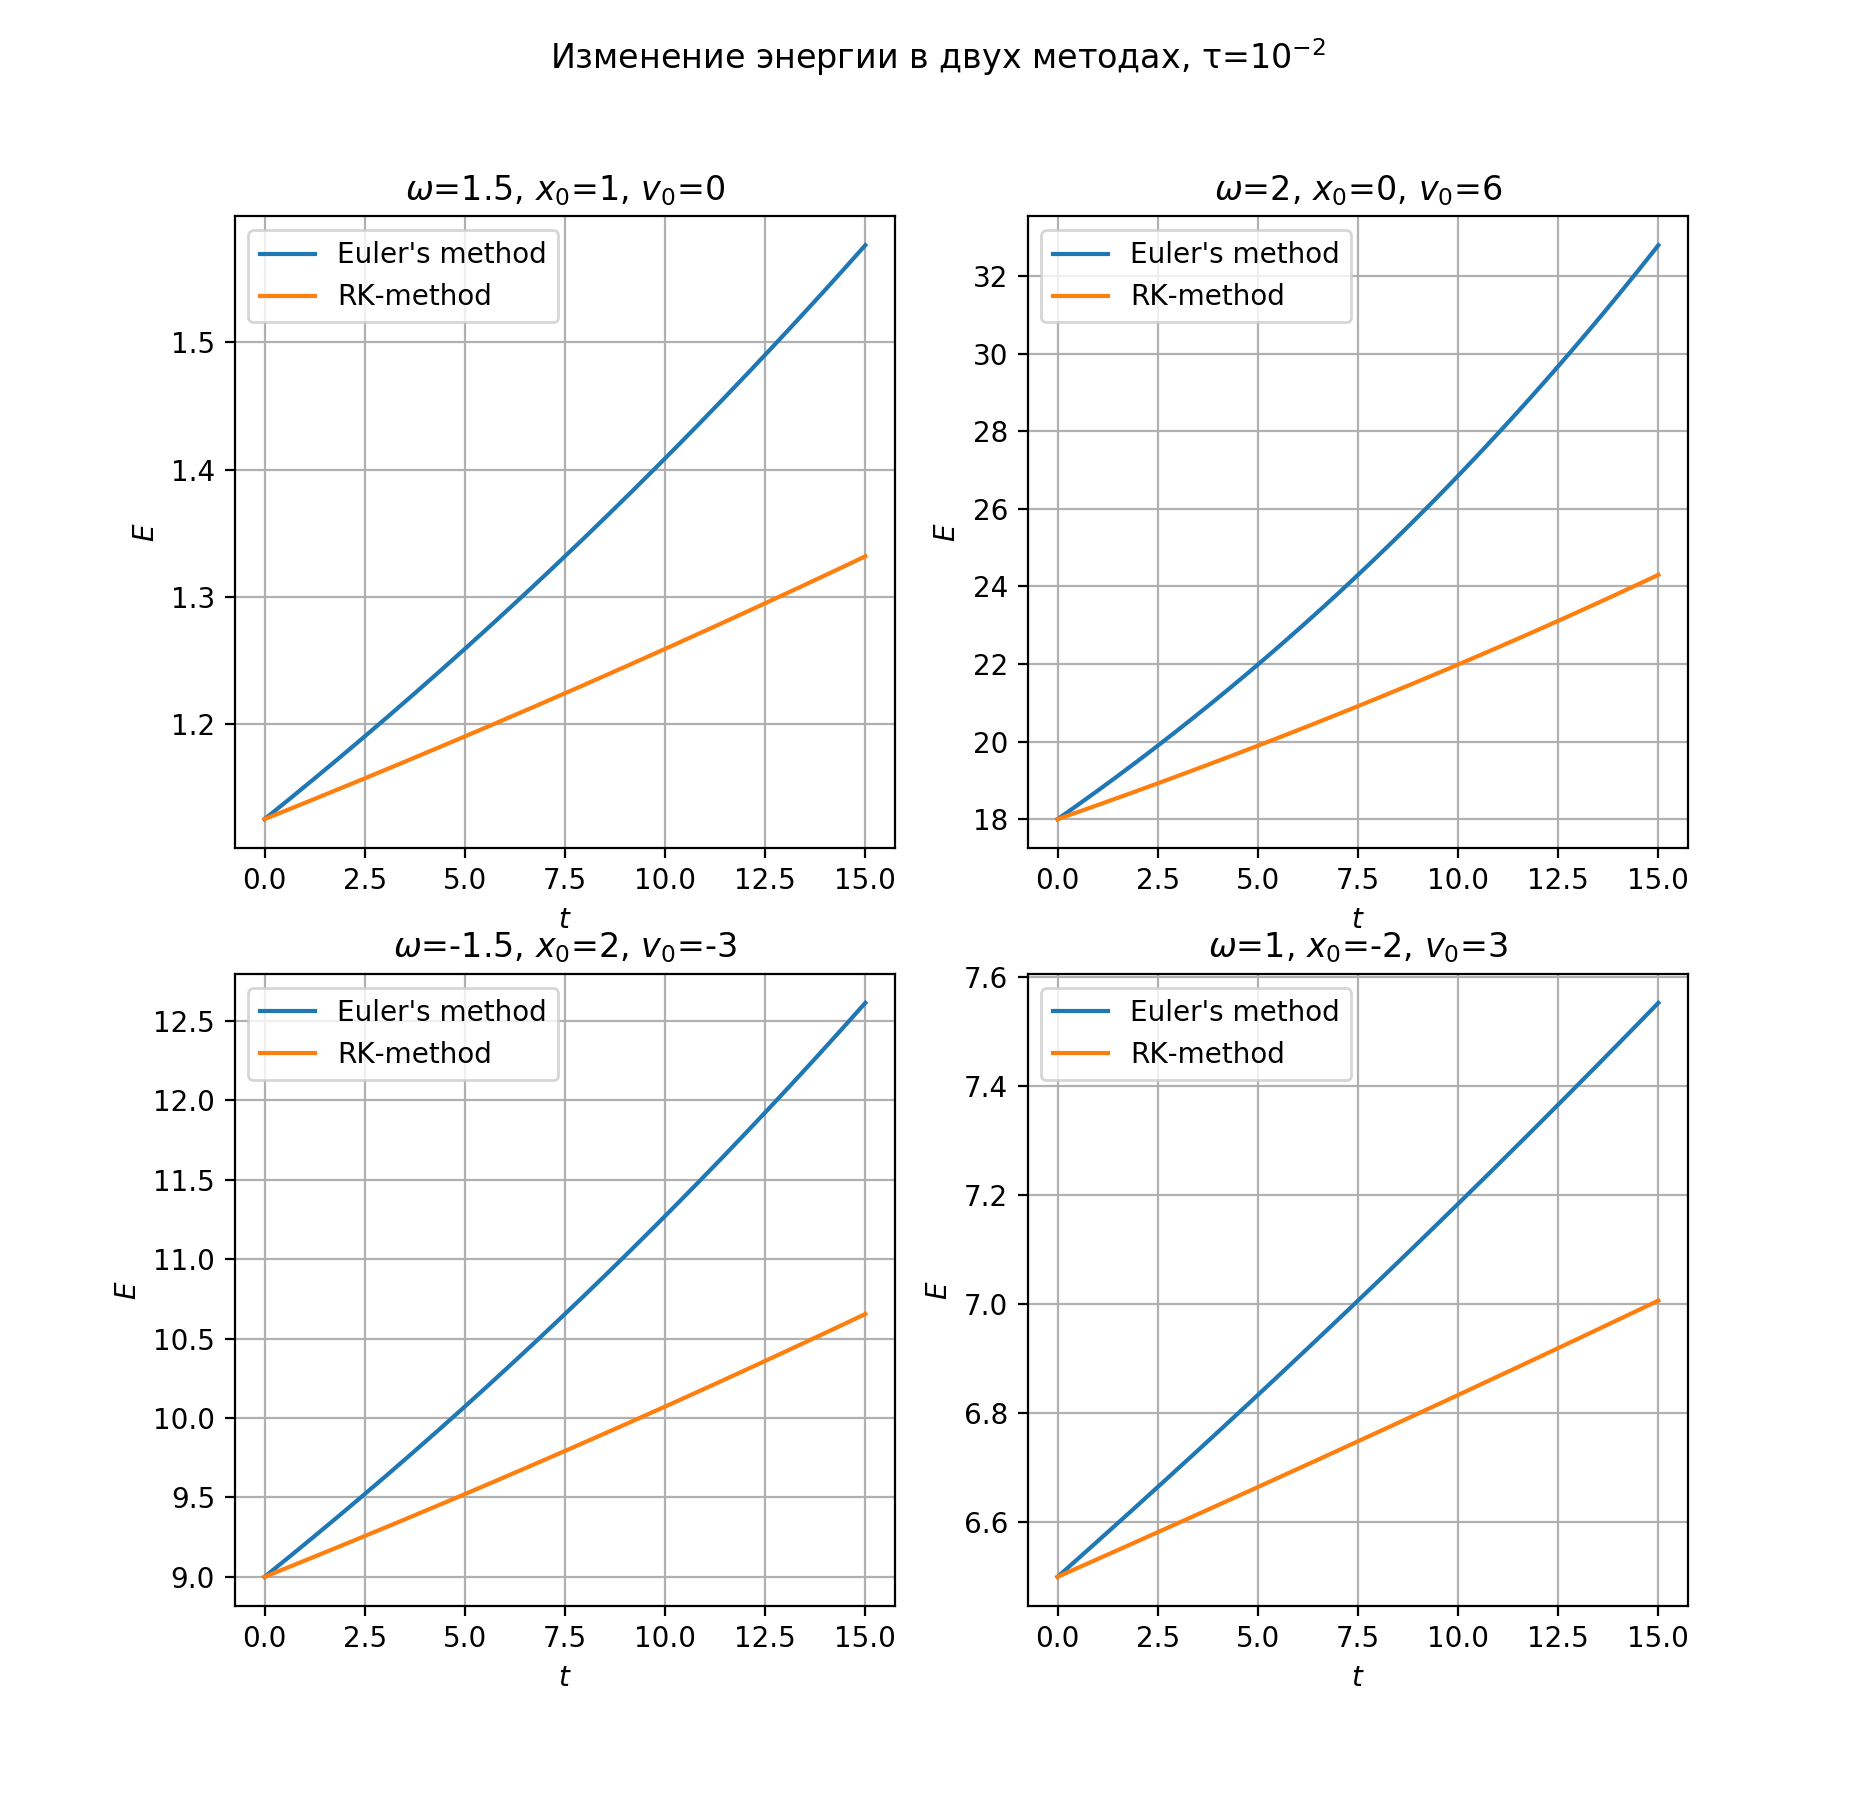

In [16]:
plt.figure()
plt.suptitle('Изменение энергии в двух методах, τ=$10^{-2}$')
i = 0

for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    i+=1
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t1, x1 = euler_solve_2(A, x0, T, 0.01)
    t2, x2 = RK_solve(A, x0, T, 0.01)
    
    plt.subplot(2, 2, i)
    plt.plot(t1, x1[:,1]**2 / 2 + w**2 * x1[:,0]**2 / 2, label="Euler's method")
    plt.plot(t2, x2[:,1]**2 / 2 + w**2 * x2[:,0]**2 / 2, label='RK-method')
    plt.title('$\omega$={}, $x_0$={}, $v_0$={}'.format(w, *x0))
    plt.xlabel('$t$')
    plt.ylabel('$E$')
    plt.grid()
    plt.legend()

Уже можно сказать, что при одинаковых параметрах метод Рунге-Кутты лучше описывает поведение системы. Для большей наглядности сравним их ещё при одном значении $\tau$

<IPython.core.display.Javascript object>


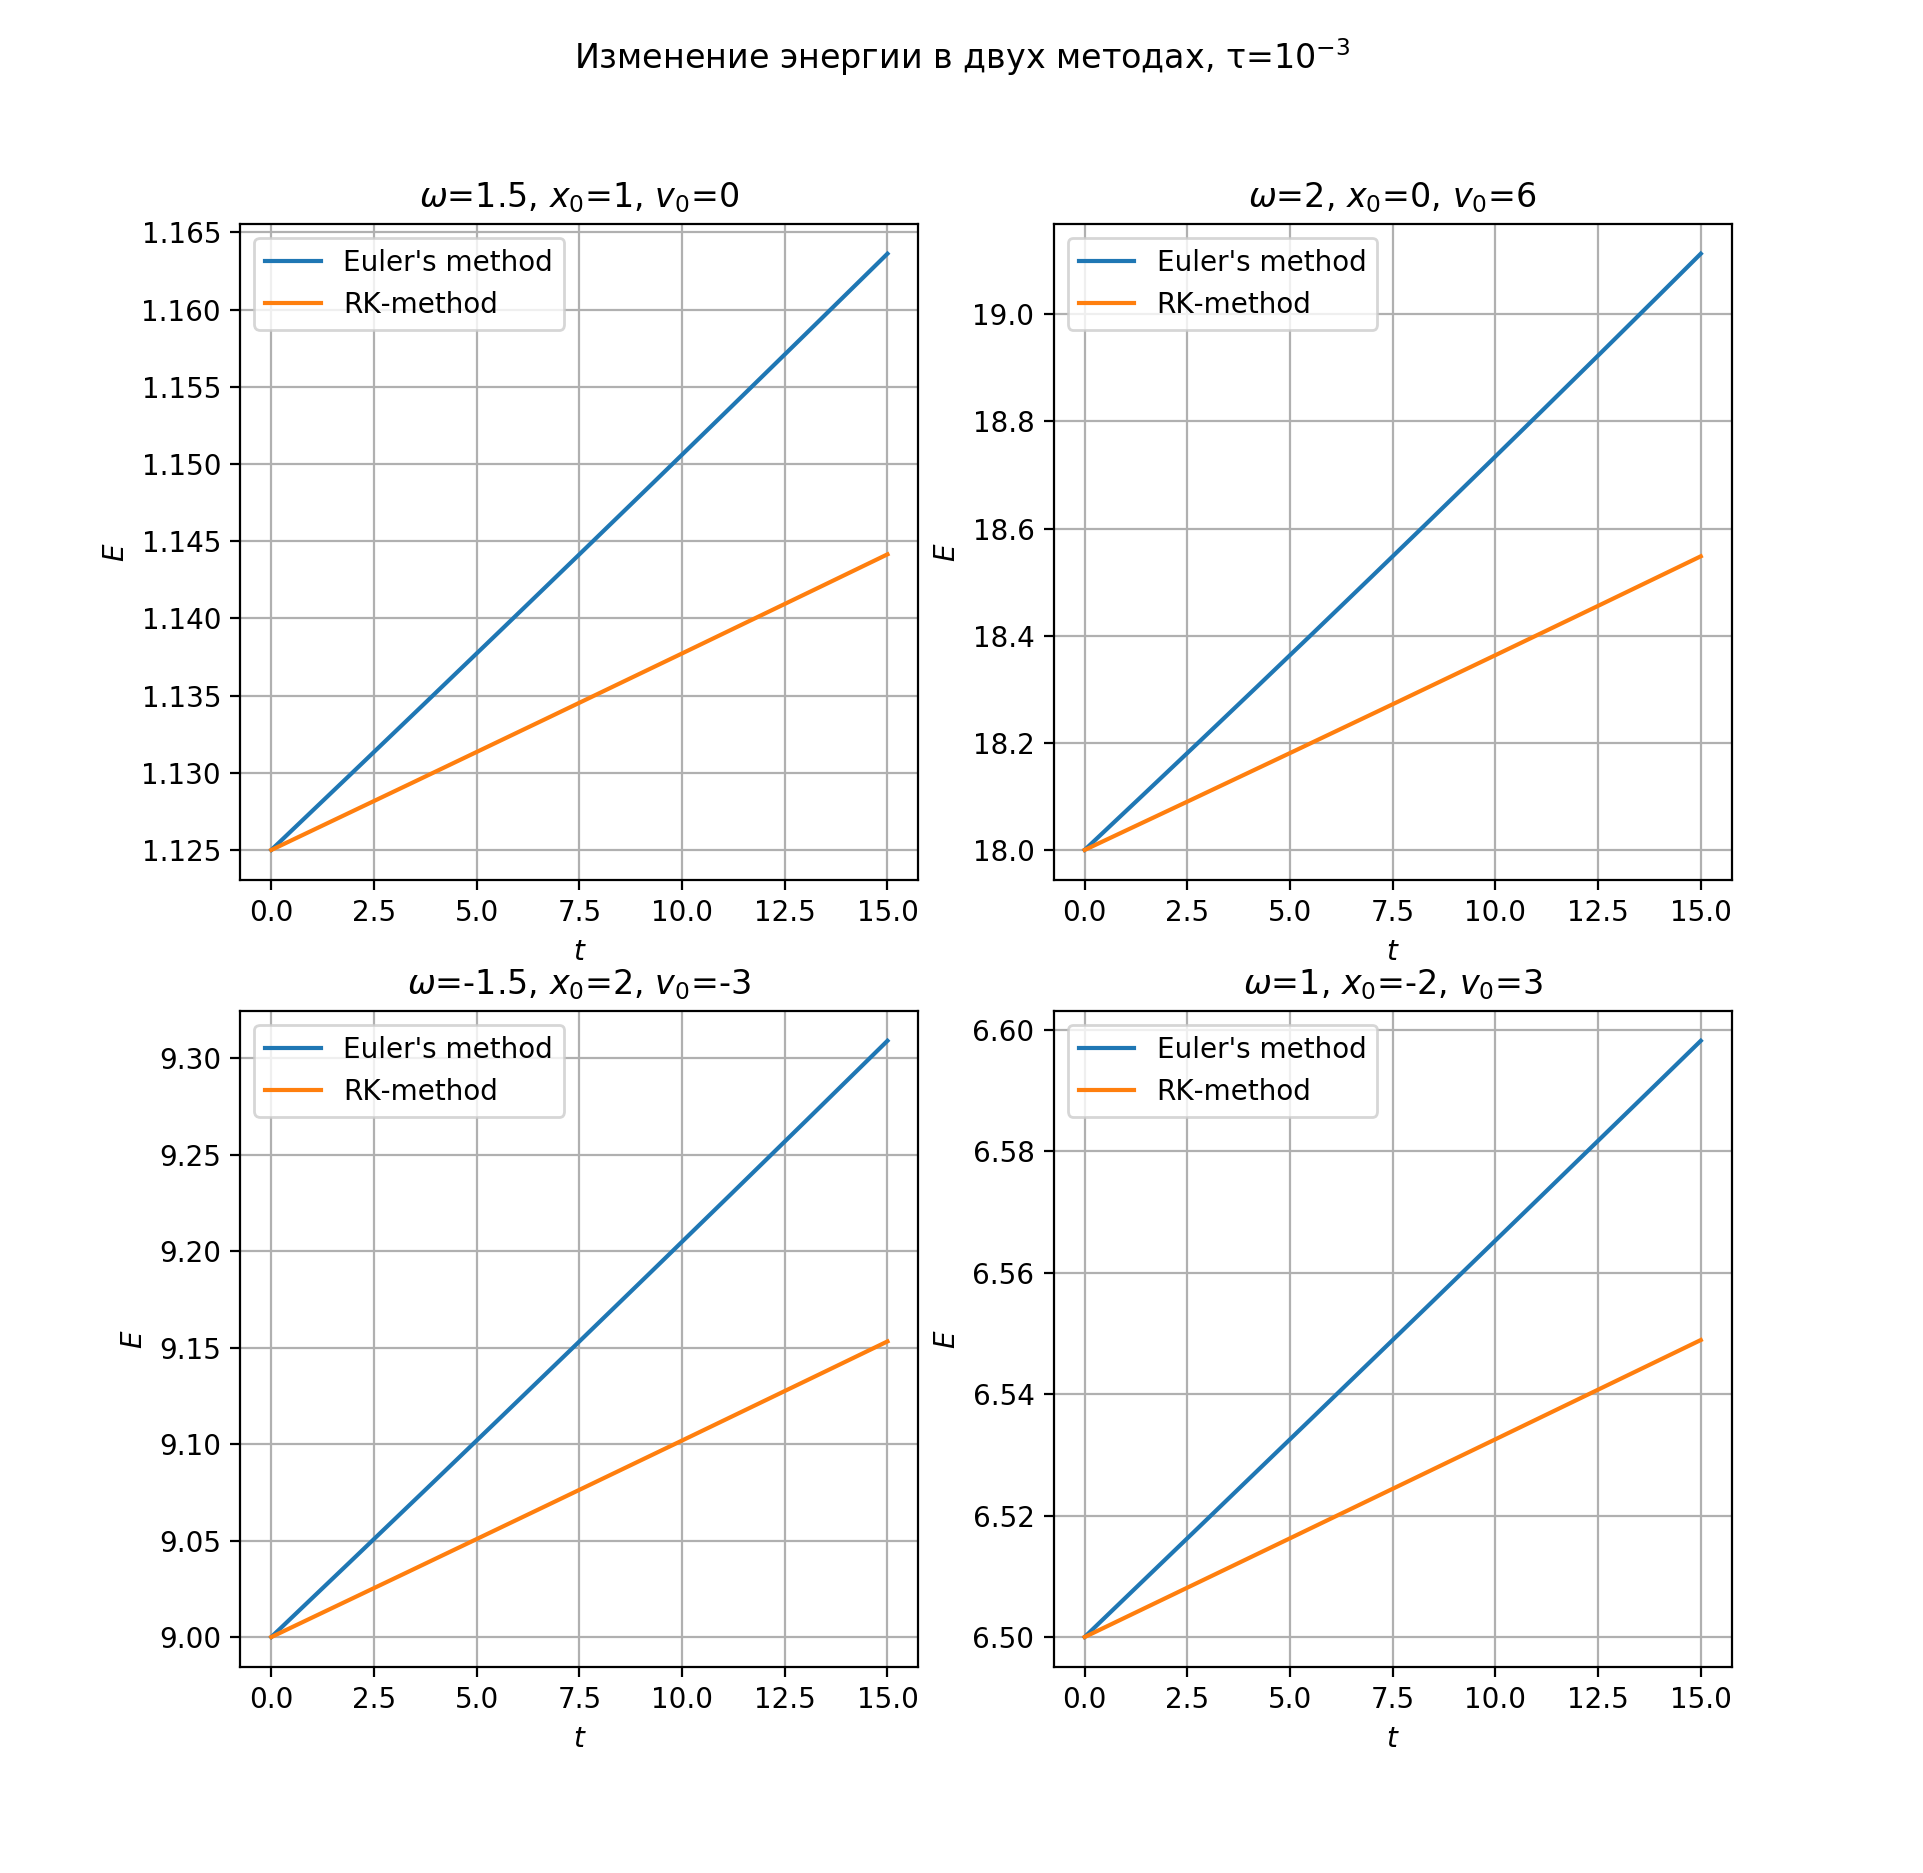

In [17]:
plt.figure()
plt.suptitle('Изменение энергии в двух методах, τ=$10^{-3}$')
i = 0

for w, x0 in [[1.5, [1, 0]], [2, [0, 6]], [-1.5, [2, -3]], [1, [-2, 3]]]:
    i+=1
    A = np.array([[0,     1], 
                  [-w**2, 0]])
    t1, x1 = euler_solve_2(A, x0, T, 0.001)
    t2, x2 = RK_solve(A, x0, T, 0.001)
    
    plt.subplot(2, 2, i)
    plt.plot(t1, x1[:,1]**2 / 2 + w**2 * x1[:,0]**2 / 2, label="Euler's method")
    plt.plot(t2, x2[:,1]**2 / 2 + w**2 * x2[:,0]**2 / 2, label='RK-method')
    plt.title('$\omega$={}, $x_0$={}, $v_0$={}'.format(w, *x0))
    plt.xlabel('$t$')
    plt.ylabel('$E$')
    plt.grid()
    plt.legend()

Получили точно такой же результат. То есть удалось на практике проверить, что метод Рунге-Кутты с большей точностью решает дифференциальные уравнения